In [51]:
import pandas as pd
import numpy as np
from nfft import nfft, ndft

In [3]:
train = pd.read_csv('../data/training_set.csv')
train_meta = pd.read_csv('../data/training_set_metadata.csv')

In [59]:
train.sample(5)

,object_id,mjd,passband,flux,flux_err,detected
1191651,90160807,60571.3148,5,12.469117,13.608829,0
20560,10798,59887.0375,1,-1.017624,2.975746,0
1080316,70757696,60331.0623,5,3.843730,36.251888,0
379562,195555,59782.2372,2,0.030941,1.224807,0
328191,169967,60651.1527,3,402.582611,10.717243,1


What we want ... for each (a) object_id and (b) passband,
1. mjd
2. flux
3. flux_err

In [9]:
obj_ids = train['object_id'].unique()
print(f'There are {obj_ids.size} object_id\'s')

There are 7848 object_id's


In [67]:
obj_ids[1893]

307543

In [68]:
# For now, I want ['mjd', 'flux'] for object_id == 615, and passband == 1
filt = (train['object_id'] == 169967) & (train['passband'] == 5)
flx = train[filt][['mjd', 'flux']]
flx.head()


,mjd,flux
327873,59825.2971,-416.696411
327878,59839.2532,-116.944817
327883,59842.2359,-24.664654
327889,59854.2461,94.335342
327894,59857.2251,-132.933090


In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
# Test nfft
N = 10000
k = -N // 2 + np.arange(N)

f_x_dir = nfft.ndft()

AttributeError: 'function' object has no attribute 'ndft'

In [89]:
x = np.arange(1000) + 0.3*np.random.random(1000)
y = np.sin((1./50)*(2*np.pi)*x) + np.sin((1./23)*(2*np.pi)*x) + 1

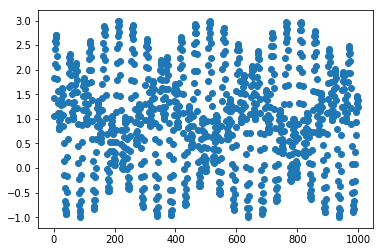

In [90]:
plt.scatter(x,y)

In [78]:
y_fft = nfft(x,y)
y_dft = ndft(x,y)

In [91]:
freq, power = LombScargle(x, y).autopower()

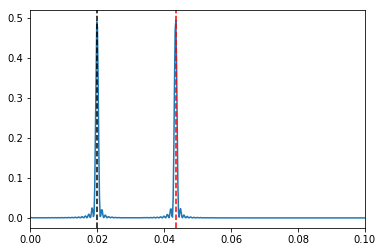

In [100]:
plt.plot(freq, power)
plt.xlim([0, 0.1])
plt.axvline(1/50., c='black', linestyle='--')
plt.axvline(1/23., c='red', linestyle='--')

Frequencies at 50 Hz and 23 Hz (so, harmonics at 46 Hz, 69 Hz, 92 Hz, and 100 Hz

C:\Users\Ryan Abrahams\Anaconda3\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


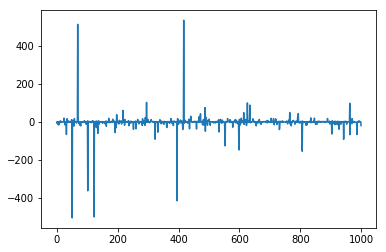

In [92]:
plt.plot(y_fft)

Ok, let's see what comes out when I perform this nfft on some data!

In [101]:
# recall:
flx.head()

,mjd,flux
327873,59825.2971,-416.696411
327878,59839.2532,-116.944817
327883,59842.2359,-24.664654
327889,59854.2461,94.335342
327894,59857.2251,-132.933090


In [102]:
x = flx['mjd']
y = flx['flux']

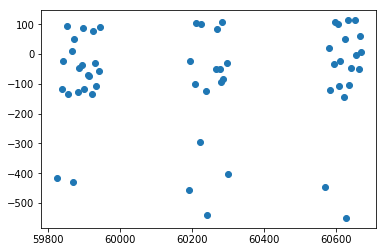

In [103]:
plt.scatter(x, y)

In [86]:
from astropy.stats import LombScargle

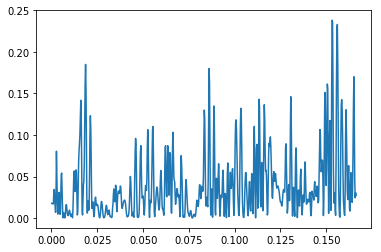

In [104]:
freq, power = LombScargle(x, y).autopower()
plt.plot(freq, power)

In [121]:
len(x)

56

In [116]:
isinstance(train, pd.DataFrame)

True

In [151]:
def fluxFor(object_id=615, passband=1, data=train, keys=['mjd', 'flux']):
    """
        Custom filtering function
        
        parameters:
        id: <number> object_id of interest
        passband: <number> passband; one of [1, 2, 3, 4, 5]
        data: <pd.DataFrame> data we want to go through
        keys: list<string> a list of column names we want to return
        
        returns:
        Pandas dataframe with the specified keys of the object_id and passband
    """
    if (not isinstance(data, pd.DataFrame)):
        raise TypeEror('date must be a pandas data frame')
        
    filt = (train['object_id'] == object_id) & (train['passband'] == passband)
    return train[filt][keys]

def LS_Power(x, y, dy=None, prob=False):
    """
        parameters:
        x: list<float> time data -- when the observations were taken
        y: list<float> the value of the function; f(x)
        
        returns:
        f: list<float> frequencies, in Hz
        p: list<float> the power (spectrum).
    """
    if (dy == None):
        ls = LombScargle(x, y).autopower()
    else:
        ls = LombScargle(x, y, dy).autopower()
    
    f, p = ls.autopower()
    
    if (prob):
        probabilities = ls.false_alarm_probability(p.max())
        return f, p, probabilities
    else:
        return f, p

In [123]:
# Now, we want to go through all object_id's and all passbands. Create a hierarchical object . . .
# [object_id, passband, ]

In [131]:
# Grab two random object id's
i = np.floor(len(obj_ids) * np.random.random(2)).astype(int)

# let's looks at the frequencies -- are they the same???
a = fluxFor(obj_ids[0], 1, train)
b = fluxFor(obj_ids[1], 1, train)

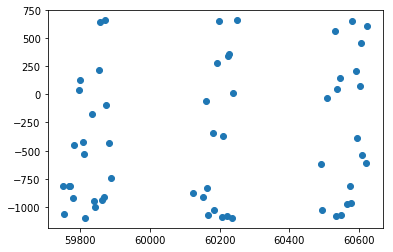

In [132]:
plt.scatter(a['mjd'], a['flux'])

In [134]:
freq_a, pow_a = LS_Power(a['mjd'], a['flux'])
freq_b, pow_b = LS_Power(b['mjd'], b['flux'])

725


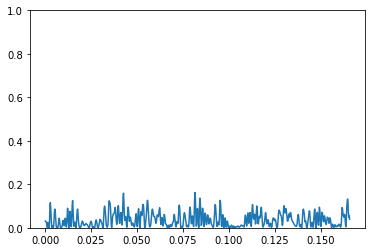

In [165]:
plt.plot(freq_a, pow_a)
plt.ylim([0, 1])
print(len(freq_a))

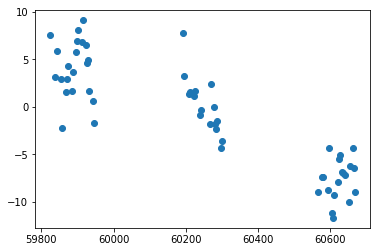

In [133]:
plt.scatter(b['mjd'], b['flux'])

700


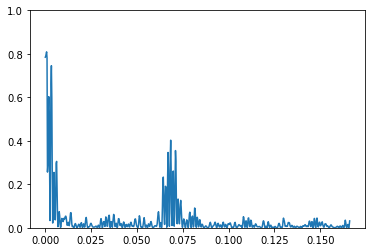

In [164]:
plt.plot(freq_b, pow_b)
plt.ylim([0, 1])
print(len(freq_b))

In [140]:
print(f'Length of freq_a is {len(freq_a)}')
print(f'Length of freq_b is {len(freq_b)}')

Length of freq_a is 725
Length of freq_b is 700


In [163]:
1./freq_b[pow_b == pow_b.max()]

array([1204.00671429])